##### Aprendizaje para determinar Estrellas

#### Ocupado el Notebook Regresión logistica 2b

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df2 = pd.read_csv("../datos/SDSS-DR14.csv")
df2.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Podemos determinar que gran cantidad de datos forman parte de un formato numérico, por lo que no presentará problemas en la comparación y representación de los mismos.

In [4]:
df2.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Logramos ver ademas que basado en al dataset en su complejidad, no nos daría inconsistencias en cuanto al exceso de ruido que ésto pueda generar.

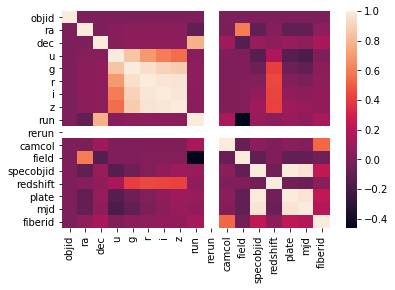

In [5]:
sb.heatmap(df2.corr())
df2_data = df2

Se logra visualizar que "rerun" presenta una relación muy alta de dependencia con las demás variables, por lo que sería la principal candidata para ser eliminada del campo de apredizaje.

In [6]:
df2_data = df2_data.drop(['rerun'],axis=1)

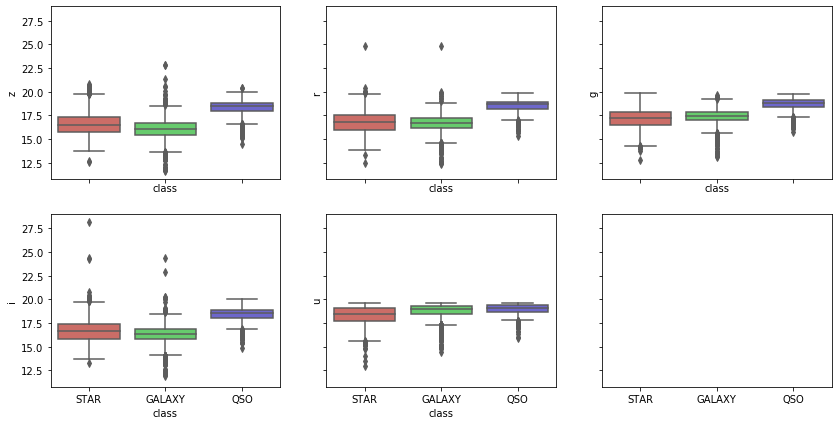

In [7]:
fig, axes = plt.subplots(2, 3,figsize=(14,7), sharex=True, sharey=True)
sb.boxplot(palette='hls', data=df2_data,x="class", y='z',ax=axes[0,0])
sb.boxplot(palette='hls', data=df2_data,x="class", y='r',ax=axes[0,1])
sb.boxplot(palette='hls', data=df2_data,x="class", y='g',ax=axes[0,2])
sb.boxplot(palette='hls', data=df2_data,x="class", y='i',ax=axes[1,0])
sb.boxplot(palette='hls', data=df2_data,x="class", y='u',ax=axes[1,1])

Los parámetros de luz z,r,g,i presentan una disparidad frente a la colección de datos QSO por lo que podrían presentar problemas en nuestras predicciones.

In [8]:
df2_data = df2_data.drop(['z','r','g','i'],axis=1)

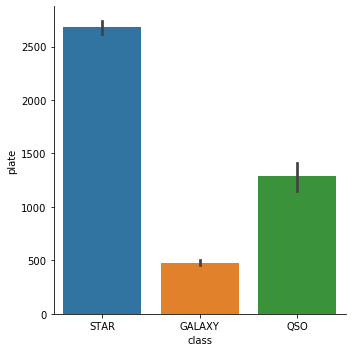

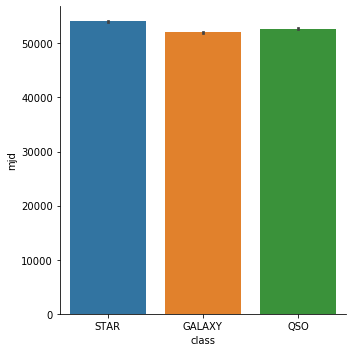

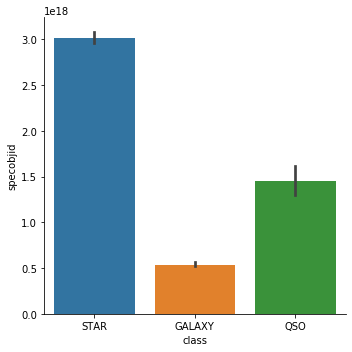

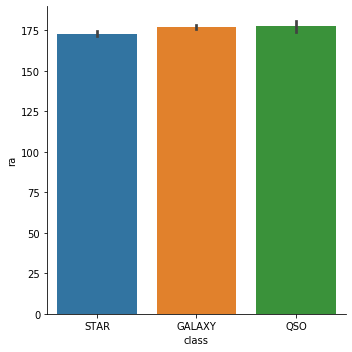

In [9]:
sb.catplot(kind='bar',data=df2_data,x="class", y='plate',ax=axes[0,0])
sb.catplot(kind='bar',data=df2_data,x="class", y='mjd',ax=axes[0,1])
sb.catplot(kind='bar',data=df2_data,x="class", y='specobjid',ax=axes[1,0])
sb.catplot(kind='bar',data=df2_data,x="class", y='ra',ax=axes[1,1])

Con los siguientes datos, cuales presentan un grado de relación muy bajo entre la estrella y un Quasar, por lo que se debe revisar si éstos no alteran la representación de clasificación

In [10]:
df2_data = df2_data.drop(['specobjid','plate'],axis=1)

### Transformación de clases a variables numéricas

Elimino todos los datos que están relacionados con estrellas, además de los parámetros de luz z,r,i cuales conforman disparidad en las medias de lo que queremos buscar que es para saber si es QUASAR o GALAXIA

In [11]:
df2_data.head()

,objid,ra,dec,u,run,camcol,field,class,redshift,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,752,4,267,STAR,-0.000009,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,752,4,267,STAR,-0.000055,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,752,4,268,GALAXY,0.123111,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,752,4,269,STAR,-0.000111,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,752,4,269,STAR,0.000590,54922,512


In [12]:
df2_data1 = df2_data[df2_data['class']!='STAR']

In [13]:
df2_data1.head()


,objid,ra,dec,u,run,camcol,field,class,redshift,mjd,fiberid
2,1.237650e+18,183.680207,0.126185,19.38298,752,4,268,GALAXY,0.123111,52023,513
6,1.237650e+18,183.864379,0.019201,19.38322,752,4,269,GALAXY,0.100242,52023,559
9,1.237650e+18,183.973498,0.081626,18.67249,752,4,270,GALAXY,0.040508,52000,400
14,1.237650e+18,184.189574,0.099482,19.25667,752,4,271,GALAXY,0.072087,52000,389
15,1.237650e+18,184.350647,0.207230,18.73832,752,4,272,QSO,0.271937,52023,587


In [14]:
df2_class = df2_data1[['class']]

In [15]:
df2_class.head()

,class
2,GALAXY
6,GALAXY
9,GALAXY
14,GALAXY
15,QSO


In [16]:
df2_class.shape[0]

5848

In [17]:
for i in range(df2_class.shape[0]):
    if df2_class.iloc[i,0]== "GALAXY":
        df2_class.iloc[i,0]=0
    elif df2_class.iloc[i,0]=="QSO":
        df2_class.iloc[i,0]=1

In [18]:
df2_class.head()

,class
2,0
6,0
9,0
14,0
15,1


In [19]:
df2_drop= df2_data1.drop(['class'],axis=1)

In [20]:
df2_data = pd.concat([df2_class,df2_drop],axis=1)

In [21]:
df2_data.head()

,class,objid,ra,dec,u,run,camcol,field,redshift,mjd,fiberid
2,0,1.237650e+18,183.680207,0.126185,19.38298,752,4,268,0.123111,52023,513
6,0,1.237650e+18,183.864379,0.019201,19.38322,752,4,269,0.100242,52023,559
9,0,1.237650e+18,183.973498,0.081626,18.67249,752,4,270,0.040508,52000,400
14,0,1.237650e+18,184.189574,0.099482,19.25667,752,4,271,0.072087,52000,389
15,1,1.237650e+18,184.350647,0.207230,18.73832,752,4,272,0.271937,52023,587


###  Revision del dataset

In [22]:
df2_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5848 entries, 2 to 9999
Data columns (total 11 columns):
class       5848 non-null int64
objid       5848 non-null float64
ra          5848 non-null float64
dec         5848 non-null float64
u           5848 non-null float64
run         5848 non-null int64
camcol      5848 non-null int64
field       5848 non-null int64
redshift    5848 non-null float64
mjd         5848 non-null int64
fiberid     5848 non-null int64
dtypes: float64(5), int64(6)
memory usage: 708.2 KB


In [23]:
df2_data.isnull().sum()

class       0
objid       0
ra          0
dec         0
u           0
run         0
camcol      0
field       0
redshift    0
mjd         0
fiberid     0
dtype: int64

In [24]:
df2_data.shape

(5848, 11)

### Proceso de entrenamiento y clasificación

In [25]:
X = df2_data.ix[:,1:df2_data.shape[1]].values
y = df2_data.ix[:,0].values

In [26]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

In [27]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [28]:
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [29]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

In [30]:
import time
start_time = time.time()

num_iter = 1000

intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)
theta = np.zeros(X.shape[1])

for i in range(num_iter):
    h = sigmoid(X, theta)
    gradient = gradient_descent(X, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    print(theta)

print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

[-3.54651163e-02 -4.38934012e+16 -6.28817874e+00 -5.24156002e-01
 -6.65890863e-01 -3.50620982e+01 -1.29326265e-01 -1.06444938e+01
  5.42190344e-03 -1.84043432e+03 -1.17607644e+01]
[-2.09302326e-02 -2.59043023e+16 -3.70870200e+00 -2.25164158e-01
 -3.90557610e-01 -2.00022144e+01 -7.56326949e-02 -6.21159371e+00
  2.31307185e-02 -1.07452895e+03 -6.21485123e+00]
[-6.39534884e-03 -7.91520349e+15 -1.12922526e+00  7.38276852e-02
 -1.15224357e-01 -4.94233071e+00 -2.19391245e-02 -1.77869357e+00
  4.08395336e-02 -3.08623581e+02 -6.68938098e-01]
[8.13953488e-03 1.00738953e+16 1.45025148e+00 3.72819529e-01
 1.60108896e-01 1.01175530e+01 3.17544460e-02 2.65420657e+00
 5.85483486e-02 4.57281789e+02 4.87697503e+00]
[-7.73255814e-02 -9.57020058e+16 -1.37055827e+01 -9.74484318e-01
 -1.44700608e+00 -7.50665270e+01 -2.80591655e-01 -2.30676813e+01
  5.16833404e-02 -3.98949222e+03 -2.41904668e+01]
[-6.27906977e-02 -7.77129070e+16 -1.11261060e+01 -6.75492475e-01
 -1.17167283e+00 -6.00066433e+01 -2.26898085e-

  1.21578530e+00  7.09369545e+02  4.42815920e+01]
[-8.54651163e-02 -1.05775901e+17 -1.50122215e+01  3.78729856e+00
 -1.45905813e+00 -4.30836269e+01 -2.70194938e-01 -2.14273256e+01
  1.20892030e+00 -3.73740446e+03  1.52141501e+01]
[-7.09302326e-02 -8.77868023e+16 -1.24327448e+01  4.08629040e+00
 -1.18372487e+00 -2.80237432e+01 -2.16501368e-01 -1.69944254e+01
  1.22662911e+00 -2.97149909e+03  2.07600633e+01]
[-5.63953488e-02 -6.97977035e+16 -9.85326802e+00  4.38528225e+00
 -9.08391621e-01 -1.29638594e+01 -1.62807798e-01 -1.25615253e+01
  1.24433793e+00 -2.20559372e+03  2.63059764e+01]
[-4.18604651e-02 -5.18086047e+16 -7.27379128e+00  4.68427409e+00
 -6.33058368e-01  2.09602428e+00 -1.09114227e-01 -8.12862517e+00
  1.26204674e+00 -1.43968835e+03  3.18518895e+01]
[-2.73255814e-02 -3.38195058e+16 -4.69431454e+00  4.98326593e+00
 -3.57725115e-01  1.71559080e+01 -5.54206566e-02 -3.69572503e+00
  1.27975556e+00 -6.73782986e+02  3.73978027e+01]
[-1.27906977e-02 -1.58304070e+16 -2.11483780e+00  

  2.20279912e+00 -2.25082238e+03  5.72945195e+01]
[-5.34883721e-02 -6.61998837e+16 -9.22248251e+00  8.55276254e+00
 -7.34879489e-01  2.37284798e+01 -1.18348153e-01 -8.23929549e+00
  2.22050793e+00 -1.48491701e+03  6.28404326e+01]
[-3.89534884e-02 -4.82107849e+16 -6.64300577e+00  8.85175439e+00
 -4.59546236e-01  3.87883635e+01 -6.46545828e-02 -3.80639535e+00
  2.23821675e+00 -7.19011645e+02  6.83863458e+01]
[-2.44186047e-02 -3.02216860e+16 -4.06352903e+00  9.15074623e+00
 -1.84212983e-01  5.38482473e+01 -1.09610123e-02  6.26504788e-01
  2.25592556e+00  4.68937244e+01  7.39322589e+01]
[-9.88372093e-03 -1.22325872e+16 -1.48405228e+00  9.44973807e+00
  9.11202696e-02  6.89081310e+01  4.27325581e-02  5.05940492e+00
  2.27363438e+00  8.12799094e+02  7.94781720e+01]
[4.65116279e-03 5.75651163e+15 1.09542446e+00 9.74872992e+00
 3.66453522e-01 8.39680147e+01 9.64261286e-02 9.49230506e+00
 2.29134319e+00 1.57870446e+03 8.50240852e+01]
[-8.08139535e-02 -1.00019390e+17 -1.40604098e+01  8.40142607e

[-6.51162791e-02 -8.05911628e+16 -1.11711737e+01  1.24212510e+01
 -8.36700609e-01  4.53609354e+01 -1.27582079e-01 -8.34996580e+00
  3.17896913e+00 -1.53014567e+03  9.38289757e+01]
[-5.05813953e-02 -6.26020640e+16 -8.59169699e+00  1.27202428e+01
 -5.61367357e-01  6.04208191e+01 -7.38885089e-02 -3.91706566e+00
  3.19667794e+00 -7.64240304e+02  9.93748889e+01]
[-3.60465116e-02 -4.46129651e+16 -6.01222025e+00  1.30192347e+01
 -2.86034104e-01  7.54807028e+01 -2.01949384e-02  5.15834473e-01
  3.21438676e+00  1.66506498e+00  1.04920802e+02]
[-2.15116279e-02 -2.66238663e+16 -3.43274351e+00  1.33182265e+01
 -1.07008511e-02  9.05405865e+01  3.34986320e-02  4.94873461e+00
  3.23209557e+00  7.67570434e+02  1.10466715e+02]
[-6.97674419e-03 -8.63476744e+15 -8.53266767e-01  1.36172184e+01
  2.64632402e-01  1.05600470e+02  8.71922025e-02  9.38163475e+00
  3.24980439e+00  1.53347580e+03  1.16012628e+02]
[7.55813953e-03 9.35433140e+15 1.72620997e+00 1.39162102e+01
 5.39965654e-01 1.20660354e+02 1.408857

[-3.72093023e-02 -4.60520930e+16 -6.03475412e+00  1.95676064e+01
 -1.18547994e-01  1.28164492e+02  2.94630643e-02  5.65824213e+00
  4.76917524e+00  8.48385653e+02  1.61157567e+02]
[-2.26744186e-02 -2.80629942e+16 -3.45527738e+00  1.98665983e+01
  1.56785259e-01  1.43224376e+02  8.31566347e-02  1.00911423e+01
  4.78688406e+00  1.61429102e+03  1.66703480e+02]
[-8.13953488e-03 -1.00738953e+16 -8.75800635e-01  2.01655901e+01
  4.32118512e-01  1.58284260e+02  1.36850205e-01  1.45240424e+01
  4.80459287e+00  2.38019639e+03  1.72249393e+02]
[6.39534884e-03 7.91520349e+15 1.70367611e+00 2.04645819e+01
 7.07451764e-01 1.73344143e+02 1.90543776e-01 1.89569425e+01
 4.82230169e+00 3.14610176e+03 1.77795306e+02]
[-7.90697674e-02 -9.78606977e+16 -1.34521581e+01  1.91172781e+01
 -8.99663213e-01  8.81600633e+01 -1.21802326e-01 -6.76494528e+00
  4.81543668e+00 -1.30067225e+03  1.48727864e+02]
[-6.45348837e-02 -7.98715988e+16 -1.08726814e+01  1.94162699e+01
 -6.24329961e-01  1.03219947e+02 -6.81087551e-

[-2.55813953e-02 -3.16608140e+16 -3.79883747e+00  2.59683228e+01
  2.79386831e-01  1.90732943e+02  1.22999316e-01  1.43580369e+01
  6.24228466e+00  2.31235340e+03  2.18732208e+02]
[-1.10465116e-02 -1.36717151e+16 -1.21936073e+00  2.62673146e+01
  5.54720083e-01  2.05792827e+02  1.76692886e-01  1.87909371e+01
  6.25999347e+00  3.07825877e+03  2.24278121e+02]
[3.48837209e-03 4.31738372e+15 1.36011601e+00 2.65663065e+01
 8.30053336e-01 2.20852710e+02 2.30386457e-01 2.32238372e+01
 6.27770229e+00 3.84416414e+03 2.29824034e+02]
[-8.19767442e-02 -1.01458517e+17 -1.37957182e+01  2.52190026e+01
 -7.77061642e-01  1.35668630e+02 -8.19596443e-02 -2.49805062e+00
  6.27083728e+00 -6.02609867e+02  2.00756592e+02]
[-6.74418605e-02 -8.34694186e+16 -1.12162415e+01  2.55179945e+01
 -5.01728389e-01  1.50728514e+02 -2.82660739e-02  1.93484952e+00
  6.28854609e+00  1.63295503e+02  2.06302505e+02]
[-5.29069767e-02 -6.54803198e+16 -8.63676472e+00  2.58169863e+01
 -2.26395136e-01  1.65788398e+02  2.54274966e-

[-3.37209302e-02 -4.17347093e+16 -5.10547624e+00  3.07301057e+01
  2.67334787e-01  2.22715843e+02  1.33396033e-01  1.59983926e+01
  7.39952161e+00  2.56444116e+03  2.58136825e+02]
[-1.91860465e-02 -2.37456105e+16 -2.52599950e+00  3.10290975e+01
  5.42668040e-01  2.37775727e+02  1.87089603e-01  2.04312927e+01
  7.41723043e+00  3.33034653e+03  2.63682738e+02]
[-4.65116279e-03 -5.75651163e+15  5.34772406e-02  3.13280893e+01
  8.18001292e-01  2.52835610e+02  2.40783174e-01  2.48641929e+01
  7.43493924e+00  4.09625190e+03  2.69228651e+02]
[9.88372093e-03 1.22325872e+16 2.63295398e+00 3.16270812e+01
 1.09333455e+00 2.67895494e+02 2.94476744e-01 2.92970930e+01
 7.45264806e+00 4.86215727e+03 2.74774564e+02]
[-7.55813953e-02 -9.35433140e+16 -1.25228802e+01  3.02797773e+01
 -5.13780433e-01  1.82711414e+02 -1.78693570e-02  3.57520520e+00
  7.44578305e+00  4.15383259e+02  2.45707122e+02]
[-6.10465116e-02 -7.55542151e+16 -9.94340350e+00  3.05787692e+01
 -2.38447180e-01  1.97771298e+02  3.58242134e-

[-1.27906977e-02 -1.58304070e+16 -1.25316153e+00  3.60898722e+01
  8.05949249e-01  2.84818511e+02  2.51179891e-01  2.65045486e+01
  8.59217620e+00  4.34833965e+03  3.08633268e+02]
[1.74418605e-03 2.15869186e+15 1.32631521e+00 3.63888641e+01
 1.08128250e+00 2.99878394e+02 3.04873461e-01 3.09374487e+01
 8.60988502e+00 5.11424502e+03 3.14179181e+02]
[-8.37209302e-02 -1.03617209e+17 -1.38295190e+01  3.50415602e+01
 -5.25832477e-01  2.14694314e+02 -7.47264022e-03  5.21556088e+00
  8.60302001e+00  6.67471016e+02  2.85111739e+02]
[-6.91860465e-02 -8.56281105e+16 -1.12500423e+01  3.53405521e+01
 -2.50499224e-01  2.29754198e+02  4.62209302e-02  9.64846101e+00
  8.62072882e+00  1.43337639e+03  2.90657652e+02]
[-5.46511628e-02 -6.76390116e+16 -8.67056553e+00  3.56395439e+01
  2.48340288e-02  2.44814082e+02  9.99145007e-02  1.40813611e+01
  8.63843764e+00  2.19928175e+03  2.96203565e+02]
[-4.01162791e-02 -4.96499128e+16 -6.09108879e+00  3.59385358e+01
  3.00167282e-01  2.59873965e+02  1.53608071e-

[1.33720930e-02 1.65499709e+16 3.56223186e+00 4.27895804e+01
 1.47921733e+00 3.62446845e+02 3.98409713e-01 3.96372435e+01
 1.00829944e+01 6.57821277e+03 3.71753822e+02]
[-7.20930233e-02 -8.92259302e+16 -1.15936024e+01  4.14422766e+01
 -1.27897652e-01  2.77262765e+02  8.60636115e-02  1.39153557e+01
  1.00761294e+01  2.13143877e+03  3.42686380e+02]
[-5.75581395e-02 -7.12368314e+16 -9.01412562e+00  4.17412684e+01
  1.47435600e-01  2.92322649e+02  1.39757182e-01  1.83482558e+01
  1.00938382e+01  2.89734413e+03  3.48232293e+02]
[-4.30232558e-02 -5.32477326e+16 -6.43464888e+00  4.20402603e+01
  4.22768853e-01  3.07382532e+02  1.93450752e-01  2.27811560e+01
  1.01115471e+01  3.66324950e+03  3.53778206e+02]
[-2.84883721e-02 -3.52586337e+16 -3.85517214e+00  4.23392521e+01
  6.98102106e-01  3.22442416e+02  2.47144323e-01  2.72140561e+01
  1.01292559e+01  4.42915487e+03  3.59324119e+02]
[-1.39534884e-02 -1.72695349e+16 -1.27569540e+00  4.26382440e+01
  9.73435359e-01  3.37502300e+02  3.00837893e-

[-5.81395349e-04 -7.19563952e+14  1.28124747e+00  4.94856075e+01
  1.41625472e+00  4.05245973e+02  4.04189466e-01  4.12222640e+01
  1.17194620e+01  6.80768620e+03  4.26652710e+02]
[1.39534884e-02 1.72695349e+16 3.86072421e+00 4.97845994e+01
 1.69158797e+00 4.20305857e+02 4.57883037e-01 4.56551642e+01
 1.17371708e+01 7.57359157e+03 4.32198623e+02]
[-7.15116279e-02 -8.85063663e+16 -1.12951100e+01  4.84372955e+01
  8.44729963e-02  3.35121777e+02  1.45536936e-01  1.99332763e+01
  1.17303058e+01  3.12681756e+03  4.03131182e+02]
[-5.69767442e-02 -7.05172674e+16 -8.71563326e+00  4.87362874e+01
  3.59806249e-01  3.50181660e+02  1.99230506e-01  2.43661765e+01
  1.17480146e+01  3.89272293e+03  4.08677095e+02]
[-4.24418605e-02 -5.25281686e+16 -6.13615652e+00  4.90352792e+01
  6.35139502e-01  3.65241544e+02  2.52924077e-01  2.87990766e+01
  1.17657234e+01  4.65862830e+03  4.14223008e+02]
[-2.79069767e-02 -3.45390698e+16 -3.55667978e+00  4.93342711e+01
  9.10472755e-01  3.80301428e+02  3.06617647e-

[-1.62790698e-02 -2.01477907e+16 -1.32076313e+00  5.57349874e+01
  1.30840758e+00  4.42869879e+02  4.00153899e-01  4.19317715e+01
  1.32565417e+01  6.88850142e+03  4.77343562e+02]
[-1.74418605e-03 -2.15869186e+15  1.25871361e+00  5.60339793e+01
  1.58374083e+00  4.57929762e+02  4.53847469e-01  4.63646717e+01
  1.32742505e+01  7.65440679e+03  4.82889475e+02]
[1.27906977e-02 1.58304070e+16 3.83819035e+00 5.63329711e+01
 1.85907408e+00 4.72989646e+02 5.07541040e-01 5.07975718e+01
 1.32919593e+01 8.42031216e+03 4.88435388e+02]
[-7.26744186e-02 -8.99454942e+16 -1.13176439e+01  5.49856673e+01
  2.51959106e-01  3.87805566e+02  1.95194938e-01  2.50756840e+01
  1.32850943e+01  3.97353815e+03  4.59367946e+02]
[-5.81395349e-02 -7.19563953e+16 -8.73816713e+00  5.52846591e+01
  5.27292359e-01  4.02865450e+02  2.48888509e-01  2.95085841e+01
  1.33028031e+01  4.73944352e+03  4.64913859e+02]
[-4.36046512e-02 -5.39672965e+16 -6.15869039e+00  5.55836510e+01
  8.02625612e-01  4.17925333e+02  3.02582079e-

In [31]:
result = sigmoid(X, theta)

In [32]:
print(result)

[0. 0. 0. ... 0. 0. 0.]


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y, result)
print(confusion_matrix)
print(classification_report(y, result))

[[4998    0]
 [ 850    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      4998
           1       0.00      0.00      0.00       850

    accuracy                           0.85      5848
   macro avg       0.43      0.50      0.46      5848
weighted avg       0.73      0.85      0.79      5848



## Usando algoritmo de aprendizaje a través de Scikit-Learn en la obtención de resultados

In [34]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
print(X_test)

[[1.00000000e+00 1.23765000e+18 2.37257717e+02 ... 8.16812500e-02
  5.16910000e+04 8.50000000e+01]
 [1.00000000e+00 1.23765000e+18 1.92970659e+02 ... 7.93507500e-02
  5.19880000e+04 1.89000000e+02]
 [1.00000000e+00 1.23765000e+18 1.77925981e+02 ... 1.35971900e-01
  5.19430000e+04 1.35000000e+02]
 ...
 [1.00000000e+00 1.23765000e+18 1.66466440e+02 ... 7.03246100e-02
  5.19000000e+04 2.82000000e+02]
 [1.00000000e+00 1.23765000e+18 1.97240698e+02 ... 5.83715100e-01
  5.19860000e+04 5.14000000e+02]
 [1.00000000e+00 1.23765000e+18 1.50994181e+02 ... 4.65950600e-02
  5.19100000e+04 5.26000000e+02]]


In [36]:
#Aprendizaje
LogReg = LogisticRegression(max_iter=1000,penalty='l1',solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [38]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1506,    6],
       [  30,  213]])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1512
           1       0.97      0.88      0.92       243

    accuracy                           0.98      1755
   macro avg       0.98      0.94      0.96      1755
weighted avg       0.98      0.98      0.98      1755



## Usando Oversampling para lograr clasificar Quasar

In [40]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# define pipeline
steps = [('over', RandomOverSampler()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.216
